# Анализ для авиакомпании "F9"

Компания «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

***Описание извленченных датафреймов:***

[**/datasets/query_1.csv**](#no1) — результат первого запроса: <a class="anchor" id="q1"></a>

- *model* — модель самолета
- *flights_amount* — количество рейсов для каждой модели самолетов model в сентябре 2018 года

[**/datasets/query_3.csv**](#no3) — результат третьего запроса: <a class="anchor" id="q3"></a>

- *city* — города
- *average_flights* — среднее количество рейсов, прибывающих в город city за день в сентябре 2018 года

*Задачи*:

- [импортировать файлы](#files-import);
- [изучить данные в них](#data-learn);
- [проверить типы данных на корректность](#data-type);
- [выбрать топ-10 городов по количеству рейсов](#top10);
- построить графики: [модели самолетов и количество рейсов](#model-flight), [города и количество рейсов](#city-flight), [топ-10 городов и количество рейсов](#top10-flight);
- [сделать выводы по каждому из графиков, пояснить результат](#results).

[**/datasets/query_last.csv**](#last) — результат последнего запроса: <a class="anchor" id="qlast"></a>

- *week_number* — номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week* — есть ли на этой неделе фестиваль;
- *festival_name* — название фестиваля.

*Проверить гипотезу:*

[«Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»](#hypothesis)

### Импорт файлов <a class="anchor" id="files-import"></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
q1 = pd.read_csv('datasets/query_1.csv', index_col=0)
q3 = pd.read_csv('datasets/query_3.csv', index_col=0)

### Исследование данных <a class="anchor" id="data-learn"></a>

#### Запрос #1 <a class="anchor" id="no1"></a>

In [3]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [4]:
q1 = q1.sort_values(by='flights_amount', ascending=False).reset_index(drop=True)
q1

,model,flights_amount
0,Cessna 208 Caravan,4557
1,Bombardier CRJ-200,4446
2,Sukhoi SuperJet-100,4185
3,Airbus A321-200,960
4,Boeing 737-300,630
5,Airbus A319-100,607
6,Boeing 767-300,600
7,Boeing 777-300,300


[Описание данных запроса **q1**](#q1)

---
<h4> Модели самолетов (<i>внешние ссылки</i>): </h4> <br>
<a href=https://ru.wikipedia.org/wiki/Cessna_208> Cessna 208 Caravan </a> <br>
<a href=https://ru.wikipedia.org/wiki/Bombardier_CRJ200> Bombardier CRJ-200 </a> <br>
<a href=https://ru.wikipedia.org/wiki/Sukhoi_Superjet_100> Sukhoi SuperJet-100 </a> <br>
<a href=https://ru.wikipedia.org/wiki/Airbus_A320> Airbus A319-100 и Airbus A321-200</a> <br>
<a href=https://ru.wikipedia.org/wiki/Boeing_737> Boeing 737-300 </a> <br>
<a href=https://ru.wikipedia.org/wiki/Boeing_767> Boeing 767-300 </a> <br>
<a href=https://ru.wikipedia.org/wiki/Boeing_777> Boeing 777-300 </a>

---

Ссылки на модели представлены для сравнения конфигурации моделей самолетов. Дело в то что модель самолета "Cessna 208 Caravan" - это легкий самолет, рассчитанный на перевозку 9ти человек. Кажется, что он малодоступен, однако в сентябре именно эти самолеты совершили максимальное количество перелетов - 4557.

Остальные модели не вызывают подобных вопросов.

#### Запрос #3 <a class="anchor" id="no3"></a>

In [5]:
q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [6]:
q3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


[Описание данных запроса **q3**](#q3)

### Корректность типов данных <a class="anchor" id="data-type"></a>

Данные [запроса №1](#no1) можно разделить на две группы:
- 4185 - 4557 вылетов (3 модели самолетов)
- 300 - 960 вылетов (5 моделей самолетов)

Странным кажется такая сильная разница между группами в 3000 вылетов. Дополнительно настораживает непопулярность моделей представленных в первой группе. В остальном никаких пропусков и аномалий в этом запросе не наблюдается.

Для [запроса №3](#no3) построим гистограмму:

In [7]:
q3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


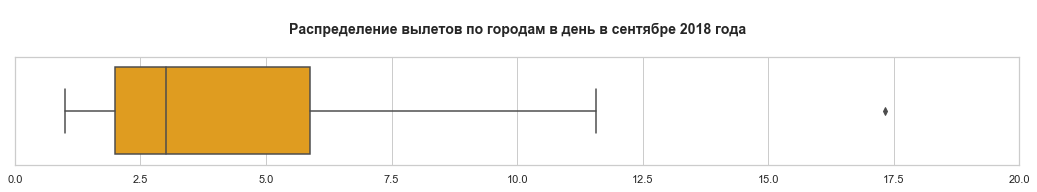

In [8]:
q3_box = sns.boxplot(data=q3, x='average_flights', orient='h', color='orange')
q3_box.set_title('\nРаспределение вылетов по городам в день в сентябре 2018 года\n', weight='bold').set_fontsize('14')
q3_box.set(xlim=(0,20))
q3_box.set_xlabel('')
q3_box.figure.set_size_inches(18,2)

В данном датафрейме наблюдаются выбросы выше 12 вылетов (Q3 + 1.5IQR) - это вылеты в столицу и крупнейшие города. Других значимых аномалий не наблюдается.

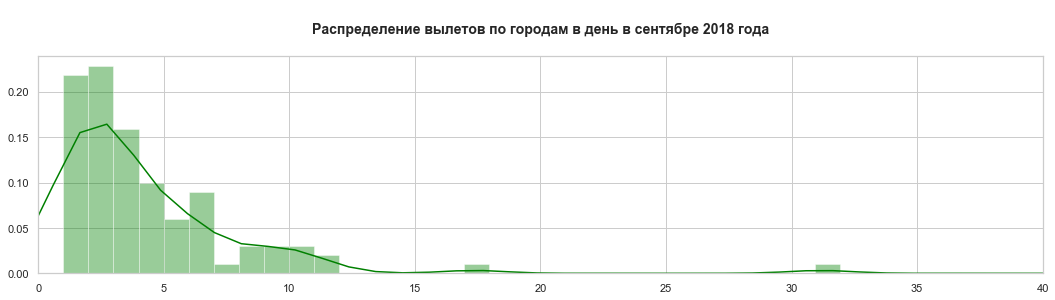

In [9]:
q3_hist = sns.distplot(q3['average_flights'], hist=True, color='green', bins=int(q3['average_flights'].max()))
q3_hist.set_title('\nРаспределение вылетов по городам в день в сентябре 2018 года\n', weight='bold').set_fontsize('14')
q3_hist.set(xlim=(0,40))
q3_hist.set_xlabel('')
q3_hist.figure.set_size_inches(18,4)

Гистограмма показывает Пуассоновское распределение. Значимых аномалий не наблюдается.

### Топ-10 городов по количеству рейсов <a class="anchor" id="top10"></a>

In [10]:
top10 = q3.sort_values(by='average_flights', ascending=False).head(10).reset_index(drop=True)
top10.style.set_caption("Топ-10 городов")

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


У Москвы и Санкт-Петербурга очевидное преимущество. Далее по списку идут все наиболее крупные города России. Люди внутри страны чаще всего летают туда, где больше развития и возможностей или туристические города.

### График: модели самолетов и количество рейсов <a class="anchor" id="model-flight"></a>

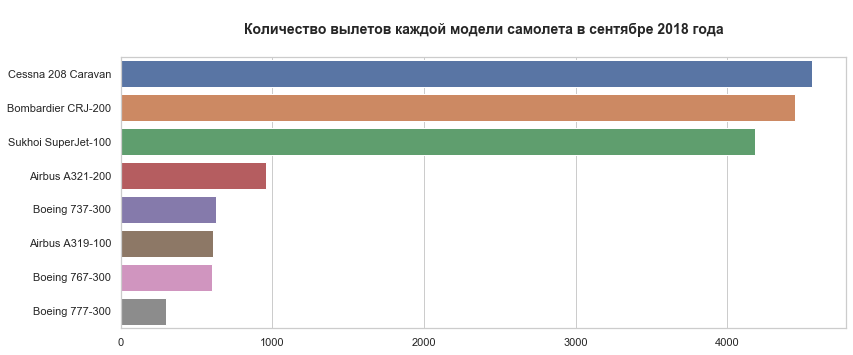

In [11]:
mod_fl = sns.barplot(x='flights_amount', y='model', data=q1, ci=None)
mod_fl.set_title('\nКоличество вылетов каждой модели самолета в сентябре 2018 года\n', weight='bold').set_fontsize('14')
mod_fl.set_xlabel('')
mod_fl.set_ylabel('')
mod_fl.figure.set_size_inches(13,5)

В очередной раз сильно выделяется группа самолетов от 4000 вылетов в противовес группе до 1000 вылетов за месяц.

### График: города и количество рейсов <a class="anchor" id="city-flight"></a>

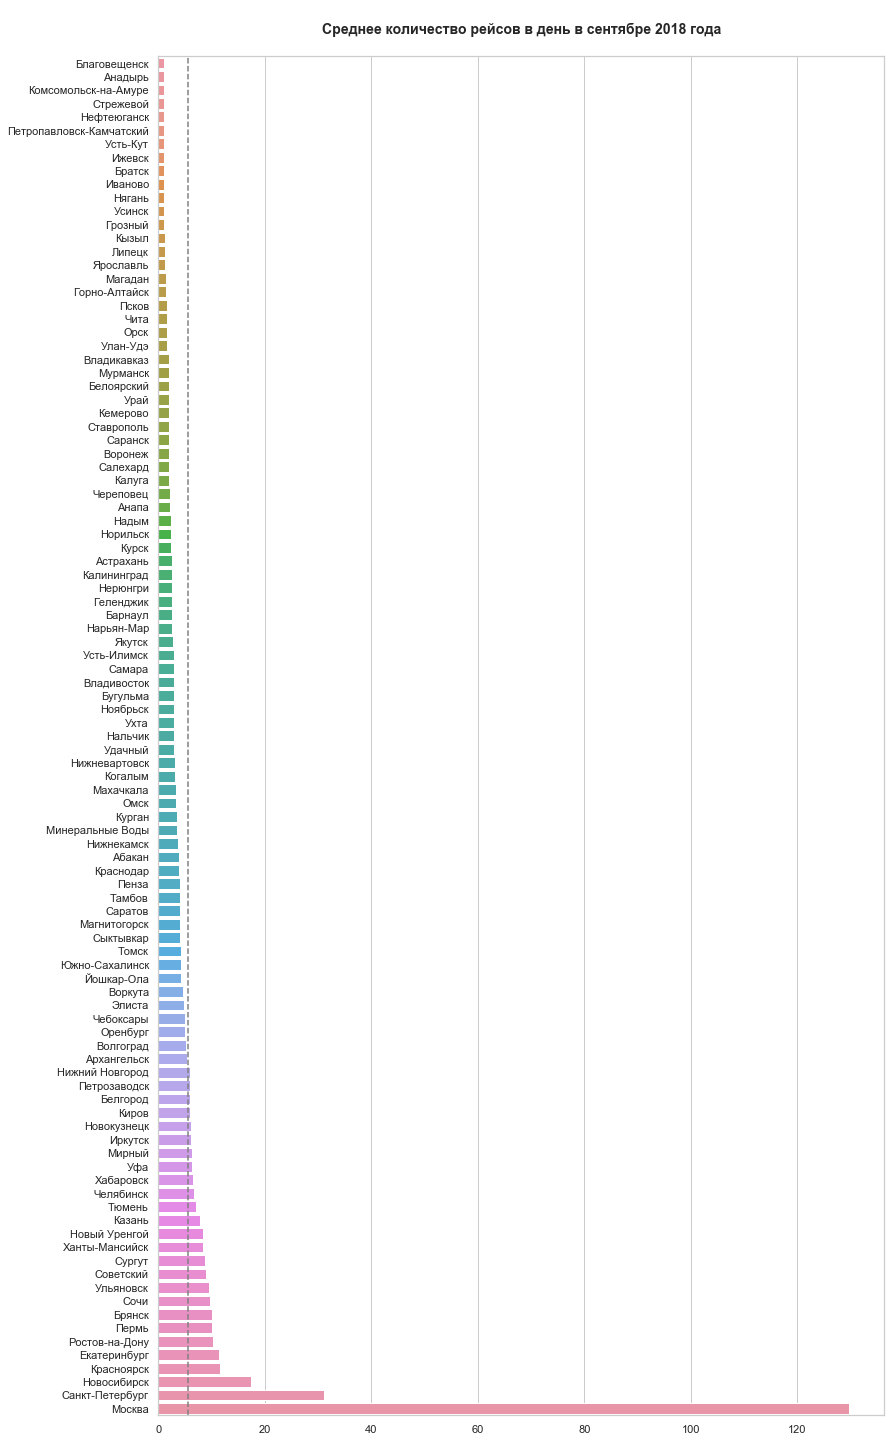

In [12]:
city_fl = sns.barplot(y='city', x='average_flights', 
                      data=q3.sort_values(by='average_flights'), ci=None)
city_fl.set_title('\nCреднее количество рейсов в день в сентябре 2018 года\n', weight='bold').set_fontsize('14')
plt.axvline(q3['average_flights'].mean(), color='gray', ls='--')
city_fl.set_xlabel('')
city_fl.set_ylabel('')
city_fl.figure.set_size_inches(13,25)

Пунктиром отмечено среднее значение - это дает возможность определить и сравнить более популярные направления с менее популярными в сентябре 2018 года. Здесь можно произвести исследования за 2 или 3 года по каждому месяцу и создать общий портрет происходящего, что позволит в дальнейшем детальнее разрабатывать популярные направления и развивать непопулярные.

### График: топ-10 городов и количество рейсов <a class="anchor" id="top10-flight"></a>

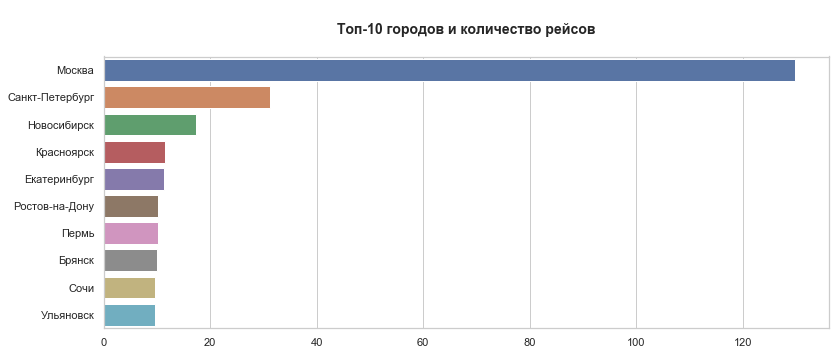

In [13]:
city_t10 = sns.barplot(y='city', x='average_flights', 
                      data=top10, ci=None)
city_t10.set_title('\nТоп-10 городов и количество рейсов\n', weight='bold').set_fontsize('14')
city_t10.set_xlabel('')
city_t10.set_ylabel('')
city_t10.figure.set_size_inches(13,5)

Очевидные лидеры топа - Москва и Санкт-Петербург.

### Общие выводы <a class="anchor" id="results"></a>

В исследовании отмечена возможная аномалия: модель самолета "Cessna 208 Caravan" - это легкий самолет, рассчитанный на перевозку 9ти человек. Кажется, что он малодоступен по стоимости массовому пассажиру, однако в сентябре именно эти самолеты совершили максимальное количество перелетов - 4557. Остальные модели не вызывают подобных вопросов.

Данные из запроса "Модели самолетов и количество вылетов каждой модели в сентябре" можно разделить на две группы:

- 4185 - 4557 вылетов (3 модели самолетов)
- 300 - 960 вылетов (5 моделей самолетов)

Такая разница (в 3000 вылетов) между предполагаемыми группами представляется аномальной и требует дополнительных исследований. Дополнительного исследования так же требует непопулярность моделей, представленных в первой группе. 

В таблице запроса "Среднее количество вылетов в сентябре 2018 года по городам" наблюдаются явные выбросы выше 12 вылетов - это вылеты в столицу и крупнейшие города.

У Москвы и Санкт-Петербурга очевидное преимущество по количеству рейсов. Далее по мере уменьшения количества вылетов идут менее крупные города России. Люди внутри страны чаще всего летают туда, где больше финансовых возможностей или туристических возможностей. 

На данных запроса "Среднее количество вылетов в сентябре 2018 года по городам" можно произвести исследования за 2 или 3 года за каждый месяц и создать общий портрет происходящего, что позволит в дальнейшем детальнее разрабатывать популярные и развивать непопулярные направления полетов.

### Проверка гипотезы <a class="anchor" id="hypothesis"></a>

[Описание данных запроса **q-last**](#qlast) <a class="anchor" id="last"></a>

In [14]:
q_last=pd.read_csv('datasets/query_last.csv', index_col=0)
q_last

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Напомним, что количество билетов сгруппировано по неделям. А так же отмечено, проходил ли в этот момент фестиваль в Москве или нет. 

__Данные взяты за период с 23 июля по 30 сентября 2018 года.__

Извлечем две выборки: набор количества билетов по неделям без фестивалей (*no_fest*) и набор количества билетов по фестивальным неделям (*is_fest*).

In [15]:
no_fest = q_last[q_last['festival_name'].isna()]['ticket_amount'].array
no_fest

<PandasArray>
[51675, 51378, 51492, 51360, 51670, 51518, 51623]
Length: 7, dtype: int64

In [16]:
is_fest = q_last[q_last['festival_name'].notna()]['ticket_amount'].array
is_fest

<PandasArray>
[43568, 51034, 51386]
Length: 3, dtype: int64

### Проверка гипотезы:

«Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»

$H_0$ : Средний спрос на билеты во время фестивалей = Средний спрос на билеты в обычное время

$H_A$ : Средний спрос на билеты во время фестивалей отличен от среднего спроса на билеты в обычное время

In [17]:
alpha = .05
results = st.ttest_ind(no_fest,is_fest, equal_var=True)

print('p-value =', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value = 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


В данном случае нулевая гипотеза сохраняется. То что средний спрос в праздничные дни такой же, что и в обычные опровергнуть не получилось.